# Data pre-processing – Perform all necessary preprocessing on the data ready to be fed to an Unsupervised algorithm 

In [102]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import svm
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv("vehicle.csv")

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [105]:
len(df.columns)

19

In [106]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

Since we were able to compute for the 5point summary for every column except class we 
can assume that there are no missing values in the form of characters in any column.


In [107]:
df.isnull().values.any()

True

In [108]:
column_names = list(df.columns)
for each in column_names:
    print(each+"----"+str(df[each].isnull().values.any()))

compactness----False
circularity----True
distance_circularity----True
radius_ratio----True
pr.axis_aspect_ratio----True
max.length_aspect_ratio----False
scatter_ratio----True
elongatedness----True
pr.axis_rectangularity----True
max.length_rectangularity----False
scaled_variance----True
scaled_variance.1----True
scaled_radius_of_gyration----True
scaled_radius_of_gyration.1----True
skewness_about----True
skewness_about.1----True
skewness_about.2----True
hollows_ratio----False
class----False


In [109]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

Handling Missing Values by replacing them with mean values for each column

In [110]:
df.fillna(df.mean(),inplace=True)

In [111]:
df.isnull().values.any()

False

Handling Outliers:

In [112]:
def replace(group):
    median, std = group.median(), group.std()  
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()       
    return group

data_corrected = (df.groupby('class').transform(replace)) 
df = data_corrected.join(pd.DataFrame(df['class']))

# Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

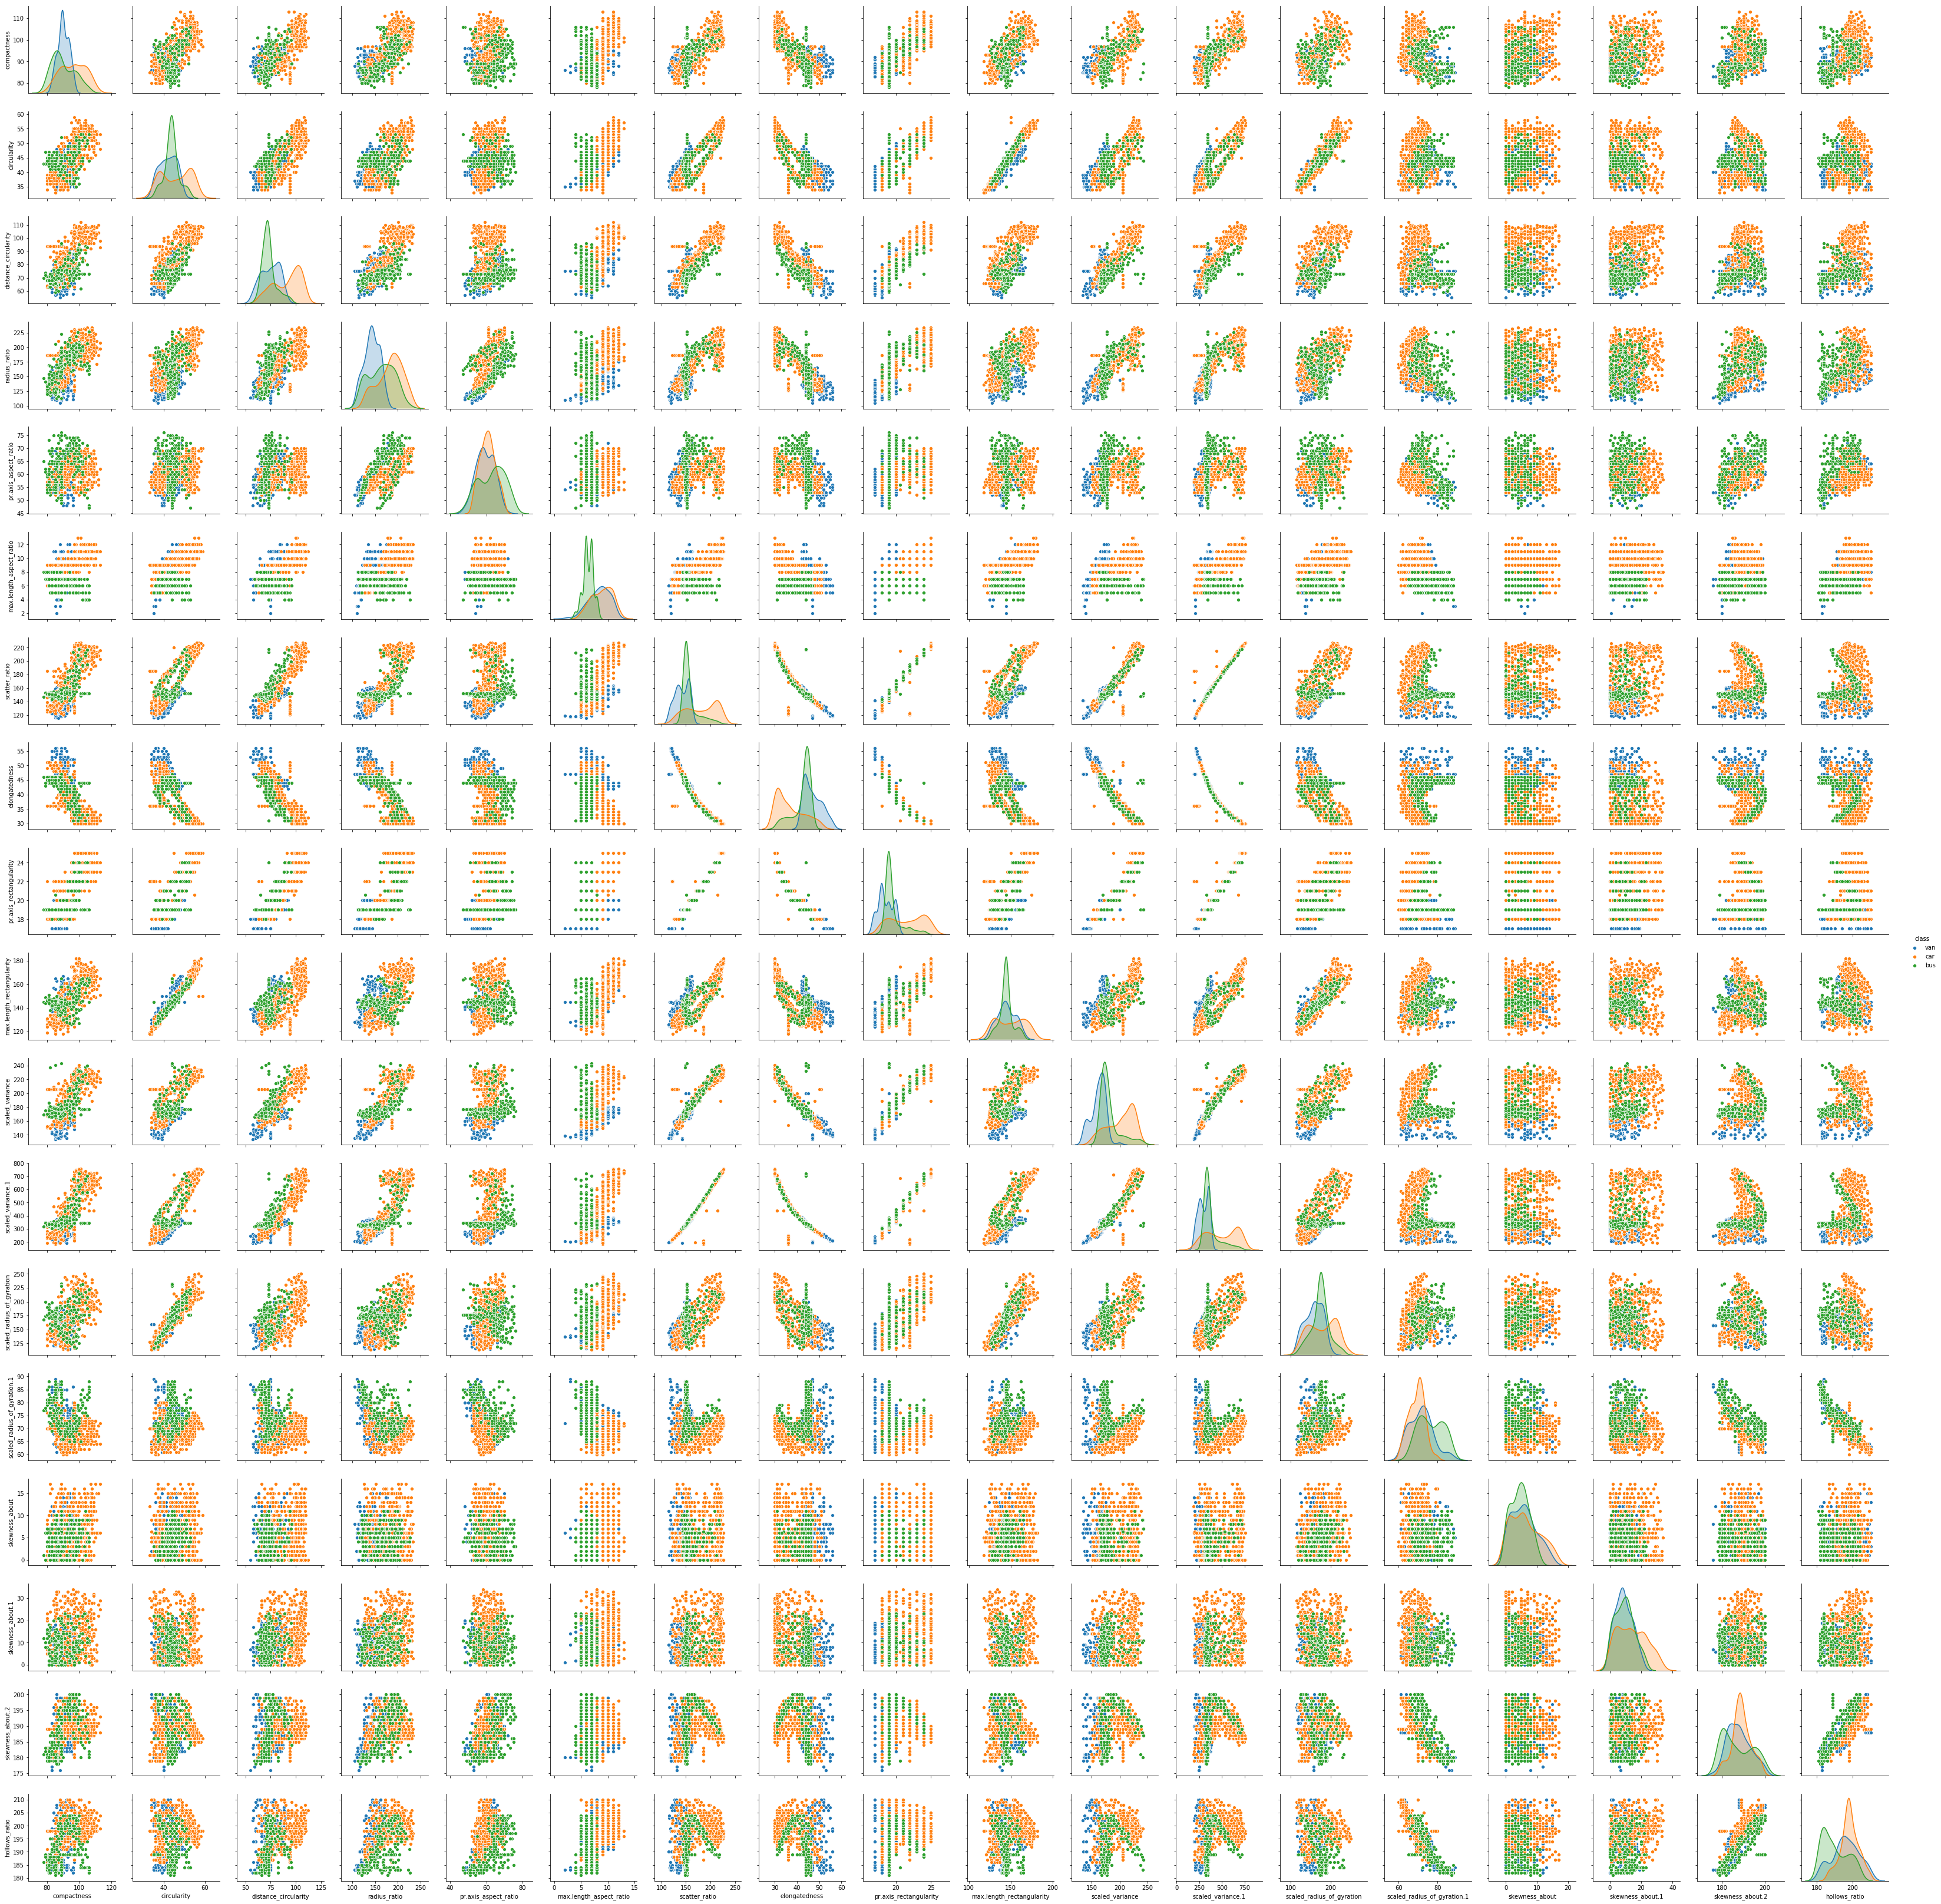

In [66]:
sns.pairplot(df,hue='class',diag_kind='kde')

In [113]:
df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.636492              0.693558   
circularity                     0.636492     1.000000              0.672814   
distance_circularity            0.693558     0.672814              1.000000   
radius_ratio                    0.692537     0.581284              0.736923   
pr.axis_aspect_ratio            0.212192     0.217931              0.203868   
max.length_aspect_ratio         0.517154     0.601751              0.672329   
scatter_ratio                   0.760192     0.810845              0.851330   
elongatedness                  -0.710495    -0.712519             -0.833273   
pr.axis_rectangularity          0.758365     0.788206              0.858404   
max.length_rectangularity       0.631202     0.949455              0.626251   
scaled_variance                 0.686436     0.704145              0.809186   
scaled_variance.1               0.777130     0.827441              0.831487   
scaled_radius_of_gyration       0.507184     0.915683              0.573288   
scaled_radius_of_gyration.1    -0.272514     0.053020             -0.255830   
skewness_about                  0.174447     0.132927              0.115282   
skewness_about.1                0.186194    -0.005588              0.267834   
skewness_about.2                0.359163    -0.003128              0.162643   
hollows_ratio                   0.385613     0.079237              0.374674   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.692537              0.212192   
circularity                      0.581284              0.217931   
distance_circularity             0.736923              0.203868   
radius_ratio                     1.000000              0.583701   
pr.axis_aspect_ratio             0.583701              1.000000   
max.length_aspect_ratio          0.436060              0.097656   
scatter_ratio                    0.780571              0.269520   
elongatedness                   -0.794930             -0.304374   
pr.axis_rectangularity           0.755847              0.232740   
max.length_rectangularity        0.501665              0.155567   
scaled_variance                  0.781505              0.256221   
scaled_variance.1                0.770724              0.280913   
scaled_radius_of_gyration        0.506934              0.189926   
scaled_radius_of_gyration.1     -0.361491             -0.304777   
skewness_about                   0.034565             -0.057227   
skewness_about.1                 0.171783             -0.021777   
skewness_about.2                 0.427471              0.449115   
hollows_ratio                    0.456339              0.347809   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.517154       0.760192   
circularity                                 0.601751       0.810845   
distance_circularity                        0.672329       0.851330   
radius_ratio                                0.436060       0.780571   
pr.axis_aspect_ratio                        0.097656       0.269520   
max.length_aspect_ratio                     1.000000       0.641523   
scatter_ratio                               0.641523       1.000000   
elongatedness                              -0.553366      -0.921934   
pr.axis_rectangularity                      0.648339       0.974095   
max.length_rectangularity                   0.646937       0.758939   
scaled_variance                             0.528434       0.906440   
scaled_variance.1                           0.623408       0.978095   
scaled_radius_of_gyration                   0.465778       0.715560   
scaled_radius_of_gyration.1                -0.299558      -0.131874   
skewness_about                              0.079958       0.078152   
skewness_about.1                            0.171177       0.224488   
skewness_about.2                            0.

From the above correlation analysis we can identify that
scatter_ratio - pr.axis_rectanugularity (0.98) - scaled_variance.1 (0.9937) are highly correlated we can drop two of them.

In [114]:
df.drop(['pr.axis_rectangularity','scaled_variance.1'],inplace=True,axis=1)

# Split the data into train and test

Here we are also scaling the data

In [83]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:16].values
X_train_sd = StandardScaler().fit_transform(X)
y = df.iloc[:,16].values
X_train, X_test, y_train, y_test = train_test_split(X_train_sd,y, test_size = 0.3, random_state = 10)

# Train a support vector machine using the train set and get the accuracy on the test set

In [115]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro")) 

Accuracy Score: 0.9488188976377953
[[ 67   4   0]
 [  2 118   5]
 [  1   1  56]]
F1 Score:  0.9477146612477064
Precision:  0.944841745841346
Recall:  0.9510597377367654


# Perform K-fold cross-validation and get the cross-validation score of the model

In [116]:
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(clf, X_train_sd, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.169% (3.950%)


# Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

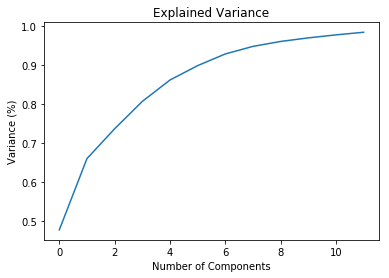

In [117]:
pca = PCA(n_components=12)
pca.fit(X_train_sd)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Looks like n=8 captures 95% variance.

In [118]:
pca = PCA(n_components=8)
X_sd_pca=pca.fit_transform(X_train_sd)
print("Before PCA",X_train_sd.shape)
print("After PCA",X_sd_pca.shape)

Before PCA (846, 16)
After PCA (846, 8)


# Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_sd_pca,y, test_size = 0.3, random_state = 10)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
print(confusion_matrix(y_test,y_pred))
print("F1 Score: ",f1_score(y_test, y_pred, average="macro"))
print("Precision: ",precision_score(y_test, y_pred, average="macro"))
print("Recall: ",recall_score(y_test, y_pred, average="macro")) 

[[ 67   4   0]
 [  2 118   5]
 [  1   1  56]]
F1 Score:  0.9477146612477064
Precision:  0.944841745841346
Recall:  0.9510597377367654


In [120]:
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(clf, X_sd_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 96.228% (4.207%)


# Compare the accuracy scores and cross-validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

After training the model on both raw data and pca components , looks like the model performed almost similar with both raw data and pca components ,much better with raw data if we also compare the F1 Score ,precision and recall. However if we can remove few columns based on correlation which would require domain expertise , a much better accuracy scores can be achieved is what i assume.